In [ ]:
import tensorflow_datasets as tfds
print(tfds.list_builders())

dataloader = tfds.load("cifar10", as_supervised=True)
train, test = dataloader["train"], dataloader["test"]



In [ ]:
import tensorflow as tf

directory_url = 'https://storage.googleapis.com/download.tensorflow.org/data/illiad/'
file_names = ['cowper.txt', 'derby.txt', 'butler.txt']

file_paths = [
    tf.keras.utils.get_file(file_name, directory_url + file_name)
    for file_name in file_names
]

dataset = tf.data.TextLineDataset(file_paths)


In [ ]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)



In [8]:
import tensorflow as tf

directory_url = 'https://storage.googleapis.com/download.tensorflow.org/data/illiad/'
file_names = ['cowper.txt', 'derby.txt', 'butler.txt']

file_paths = [
    tf.keras.utils.get_file(file_name, directory_url + file_name)
    for file_name in file_names
]

dataset = tf.data.TextLineDataset(file_paths)
for line in dataset.take(5):
  print(line.numpy())
 


b"\xef\xbb\xbfAchilles sing, O Goddess! Peleus' son;"
b'His wrath pernicious, who ten thousand woes'
b"Caused to Achaia's host, sent many a soul"
b'Illustrious into Ades premature,'
b'And Heroes gave (so stood the will of Jove)'


Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


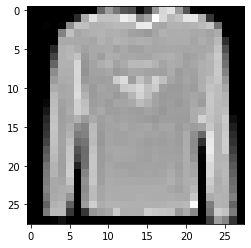

Label: 2


In [9]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt


training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")


In [10]:

import tensorflow_datasets as tfds

dataloader = tfds.load("cifar10", as_supervised=True)
train, test = dataloader["train"], dataloader["test"]

train = train.map(
    lambda image, label: (tf.image.convert_image_dtype(image, tf.float32), label)
).cache().map(
    lambda image, label: (tf.image.random_flip_left_right(image), label)
).map(
    lambda image, label: (tf.image.random_contrast(image, lower=0.0, upper=1.0), label)
).shuffle(
    100
).batch(
    64
).repeat()


In [11]:
import tensorflow as tf

directory_url = 'https://storage.googleapis.com/download.tensorflow.org/data/illiad/'
file_names = ['cowper.txt', 'derby.txt', 'butler.txt']

file_paths = [
    tf.keras.utils.get_file(file_name, directory_url + file_name)
    for file_name in file_names
]

dataset = tf.data.TextLineDataset(file_paths)


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

earlystop_callback = EarlyStopping(
  monitor='val_accuracy', min_delta=0, patiece=5)


In [2]:
def __init__(self, batch_size, num_patches, **kwargs):
        super(TemporalReshape, self).__init__()
        self.batch_size = batch_size
        self.num_patches = num_patches

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

earlystop_callback = EarlyStopping(
  monitor='val_accuracy', min_delta=0, patiece=5)


In [ ]:
model.fit(ds_train, epochs=num_epochs, validation_data=ds_test, callbacks=[earlystop_callback])
model.evaluate(ds_test)


In [ ]:
model.save('saved_model/model')


In [ ]:
model = tf.keras.models.load_model('saved_model/model')

def predict(image, model=model):
    img = tf.keras.preprocessing.image.load_img(
        image, target_size=(28, 28), color_mode='grayscale')
    img = tf.keras.preprocessing.image.img_to_array(img)
    img = tf.expand_dims(img, 0)
    pred = model.predict(img)
    score = tf.nn.softmax(pred[0])
    return np.argmax(score)

